<a href="https://colab.research.google.com/github/CashelF/Dermetric/blob/main/SkinIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin identification
### Custom model to identify if a given image is of human skin or not, trained on images of assorted objects, skin, and diseased skin

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.image as mpimg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
skin_dir = '/content/drive/MyDrive/archive/HAM10000_images_part_1'
not_skin_dir = '/content/drive/MyDrive/archive/random_images_not_skin'


base_skin_dir = '/content/drive/MyDrive/archive'
skin_dir = os.path.join(base_skin_dir, 'skin')
not_skin_dir = os.path.join(base_skin_dir, 'not_skin')


In [ ]:

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    base_skin_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 15780 images belonging to 2 classes.


In [ ]:
# Define and compile the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [ ]:
zclass_indices = train_generator.class_indices
print("Class indices:", class_indices)

# Reverse the dictionary to get class labels
class_labels = {v: k for k, v in class_indices.items()}
print("Class labels:", class_labels)

Class indices: {'not_skin': 0, 'skin': 1}
Class labels: {0: 'not_skin', 1: 'skin'}


In [ ]:

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10)

In [ ]:
import datetime

# Save the model
def save_model(model, ending="", typee=".keras"):
  modeldir = os.path.join("drive/My Drive/",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + ending + typee
  model.save(model_path)
  return model_path

save_model(model, 'skin1')


'drive/My Drive/20240613-17471718300820-skin1.keras'

In [ ]:
import tensorflow as tf

def load_model(filename):
  new_model = tf.keras.models.load_model(filename )
  return new_model

model = load_model('/content/drive/MyDrive/20240424-10121713953579-skin1.keras')

1/1 [==============================] - 0s 20ms/step


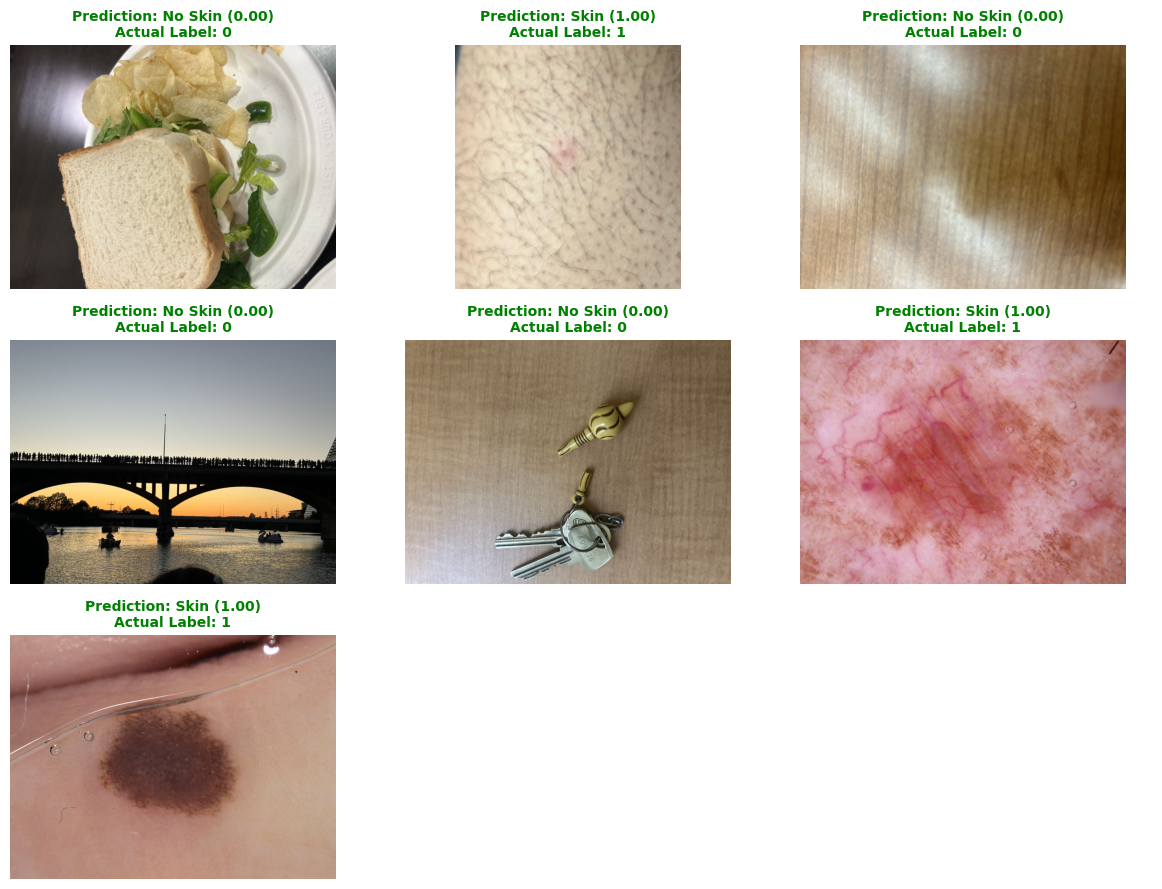

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from PIL import Image


# Function to preprocess the uploaded image
def preprocess_image(file_path, target_size=(150, 150)):
    img = image.load_img(file_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make predictions
def predict_image(file_path):
    preprocessed_img = preprocess_image(file_path)
    prediction = model.predict(preprocessed_img)
    return prediction[0]  # Return probabilities for both classes

# Function to display the image and probabilities
def display_image_with_probabilities(image_path, probabilities):
    # Open and display the image
    img = Image.open(image_path)

    # Print the probabilities
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Plot the probabilities
    classes = ['Not Skin', 'Skin']
    plt.bar(classes, probabilities)
    plt.ylabel('Probability')
    plt.title('Probabilities of Skin Presence')
    plt.show()

def display_image_with_prediction(image_path, probability, actual_label):
    # Load image using Matplotlib
    img = Image.open(image_path)

    # Convert probability to color (0: red, 1: green)
    color = 'green' if probability >= 0.5 else 'red'

    # Set the title with the prediction and actual label
    prediction = "Skin" if probability >= 0.5 else "No Skin"
    prediction_color = 'green' if prediction == actual_label else 'red'
    title = f'Prediction: {prediction} ({probability:.2f})\nActual Label: {actual_label}'

    # Plot image
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    ax.set_title(title, color=prediction_color, fontsize=14, fontweight='bold', fontfamily='serif')
    ax.axis('off')
    plt.tight_layout()
    plt.show()


def display_images_in_grid(image_paths, probabilities, actual_labels):
    num_images = len(image_paths)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

    for i, (image_path, probability, actual_label) in enumerate(zip(image_paths, probabilities, actual_labels)):
        # Load image using Matplotlib
        img = mpimg.imread(image_path)

        # Convert probability to color (0: red, 1: green)
        color = 'green' if probability >= 0.5 else 'red'

        # Set the title with the prediction and actual label
        prediction = "Skin" if probability >= 0.5 else "No Skin"
        prediction_color = 'green' if round(probability) == actual_label else 'red'
        title = f'Prediction: {prediction} ({probability:.2f})\nActual Label: {actual_label}'

        # Plot image
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(img)
        ax.set_title(title, color=prediction_color, fontsize=10, fontweight='bold', fontfamily='san-serif')
        ax.axis('off')

    # Hide empty subplots
    for j in range(i + 1, num_rows * num_cols):
        axes[j // num_cols, j % num_cols].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
upf = []
p = []
l = [0, 1, 0, 0, 0, 1, 1]

for i in range(1, 8):
  uploaded_file_path = f"/content/IMG_{i}.jpg"
  upf.append(uploaded_file_path)
  probabilities = predict_image(uploaded_file_path)
  # display_image_with_prediction(uploaded_file_path, probabilities[0], 1)
  p.append(probabilities[0])

display_images_in_grid(upf, p, l)
